<a href="https://colab.research.google.com/github/AmmarJamshed/saved-work/blob/main/ML_EDu_enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# POC Framework of EDX dataset

In [2]:
# Load the Edx dataset
df = pd.read_csv('/content/edx_courses.csv')

# Displaying first few rows of the dataset
print(df.head())

# Selecting relevant features for prediction
# Assume these columns exist in the dataset based on your description
features = ['length', 'price', 'Level', 'subject', 'course_type']
target = 'enrolled_students'  # This is the target variable we're predicting


                                               title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             summary n_enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     This course is part of a MicroMasters® Program     81,140   

                           course_type                            institution  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Se

In [3]:
# Fill missing values in 'n_enrolled' with 0 (assuming courses with no enrollment data have 0 enrollments)
df['n_enrolled'] = df['n_enrolled'].str.replace(',', '').fillna(0).astype(int)

# Continue with the rest of the data cleaning steps

# Convert 'course_length' to numeric (extracting the number of weeks)
df['course_length'] = df['course_length'].str.extract('(\d+)').astype(float)

# Extract the minimum effort per week from 'course_effort'
df['course_effort'] = df['course_effort'].str.extract('(\d+)').astype(float)


# Extract the numeric part of 'price' (we'll use the price of the certificate if applicable)
df['price'] = df['price'].str.extract('(\d+)').astype(float)

# Handle missing values in price (assume free for missing prices)
df['price'].fillna(0, inplace=True)

# encoding categoricals
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to each column
# Initialize LabelEncoder
label_encoder = LabelEncoder()
for column in ['Level', 'subject', 'course_type']:
    df[column] = label_encoder.fit_transform(df[column])

# Prepare feature set and target
features = ['course_length', 'price', 'Level', 'subject', 'course_type']
X = df[features]
y = df['n_enrolled']

# Check the cleaned dataset
X.head(), y.head()

<ipython-input-3-be45a88e6af7>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(0, inplace=True)


(   course_length  price  Level  subject  course_type
 0            2.0   49.0      2       10            1
 1            7.0   49.0      2        6            1
 2           12.0   90.0      2        6            1
 3           13.0  199.0      1        7            0
 4            4.0  249.0      2        6            1,
 0     124980
 1     293864
 2    2442271
 3     129555
 4      81140
 Name: n_enrolled, dtype: int64)

In [4]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse

9380829399.777674

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest and Decision Tree models
random_forest_model = RandomForestRegressor(random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the Random Forest model on the training set
random_forest_model.fit(X_train_scaled, y_train)

# Train the Decision Tree model on the training set
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions using Random Forest
rf_y_pred = random_forest_model.predict(X_test_scaled)

# Make predictions using Decision Tree
dt_y_pred = decision_tree_model.predict(X_test_scaled)

In [6]:

# Evaluate the Random Forest model using Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f"Random Forest MSE: {rf_mse}")

Random Forest MSE: 7720468547.704128


In [7]:


# Evaluate the Decision Tree model using Mean Squared Error (MSE)
dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f"Decision Tree MSE: {dt_mse}")

Decision Tree MSE: 24419867160.516407


# Hyper Param Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

# --- Random Forest Hyperparameter Tuning ---
rf_params = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples per leaf
    'bootstrap': [True, False]                 # Whether bootstrap samples are used
}

random_forest_model = RandomForestRegressor(random_state=42)

# Perform Grid Search for Random Forest
rf_grid = GridSearchCV(estimator=random_forest_model, param_grid=rf_params,
                       scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

rf_grid.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
print("Best Random Forest Parameters:", rf_grid.best_params_)

# Evaluate the tuned Random Forest model
rf_best_model = rf_grid.best_estimator_
rf_y_pred = rf_best_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f"Tuned Random Forest MSE: {rf_mse}")

# --- Decision Tree Hyperparameter Tuning ---
dt_params = {
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples per leaf
    'criterion': ['squared_error', 'absolute_error']  # Splitting criteria
}

decision_tree_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search for Decision Tree
dt_grid = GridSearchCV(estimator=decision_tree_model, param_grid=dt_params,
                       scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

dt_grid.fit(X_train_scaled, y_train)

# Best parameters for Decision Tree
print("Best Decision Tree Parameters:", dt_grid.best_params_)

# Evaluate the tuned Decision Tree model
dt_best_model = dt_grid.best_estimator_
dt_y_pred = dt_best_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f"Tuned Decision Tree MSE: {dt_mse}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest MSE: 6855070364.169501
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Decision Tree Parameters: {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree MSE: 9519873552.708975


 # Predicting student enrollment for online courses in Pakistan with synthetic data

In [10]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of records (you can adjust this)
num_samples = 10000

# Generate synthetic data for features
data = {
    'course_length': np.random.randint(4, 52, size=num_samples),  # Course length in weeks (4-52 weeks)
    'price': np.random.randint(1000, 50000, size=num_samples),   # Course price in PKR
    'Level': np.random.choice(['Beginner', 'Intermediate', 'Advanced'], size=num_samples),  # Course level
    'subject': np.random.choice(['Data Science', 'Programming', 'Business', 'AI/ML', 'Marketing'], size=num_samples),
    'course_type': np.random.choice(['Self-Paced', 'Instructor-Led', 'Hybrid'], size=num_samples),  # Course type
    'n_enrolled': np.random.randint(50, 5000, size=num_samples),  # Number of students enrolled
    'platform': np.random.choice(['Ilm Ki Dunya', 'EdTech Worx', 'Sabaq Foundation', 'digiskills.pk'], size=num_samples)  # Course platform
}

# Create DataFrame
df = pd.DataFrame(data)

In [11]:
df

,course_length,price,Level,subject,course_type,n_enrolled,platform
0,42,12656,Advanced,Marketing,Hybrid,2853,EdTech Worx
1,32,16893,Beginner,Business,Instructor-Led,3299,digiskills.pk
2,18,46857,Intermediate,Data Science,Hybrid,2205,EdTech Worx
3,46,17493,Intermediate,Data Science,Instructor-Led,1876,Ilm Ki Dunya
4,11,4632,Advanced,Marketing,Self-Paced,3807,Ilm Ki Dunya
...,...,...,...,...,...,...,...
9995,20,20472,Advanced,Business,Self-Paced,2510,EdTech Worx
9996,33,17524,Intermediate,AI/ML,Hybrid,2628,EdTech Worx
9997,42,47387,Advanced,Data Science,Instructor-Led,1194,Ilm Ki Dunya
9998,10,5539,Intermediate,Business,Self-Paced,4214,digiskills.pk


In [12]:
df.isnull().sum()

,0
course_length,0
price,0
Level,0
subject,0
course_type,0
n_enrolled,0
platform,0


Visualizing numerical features...


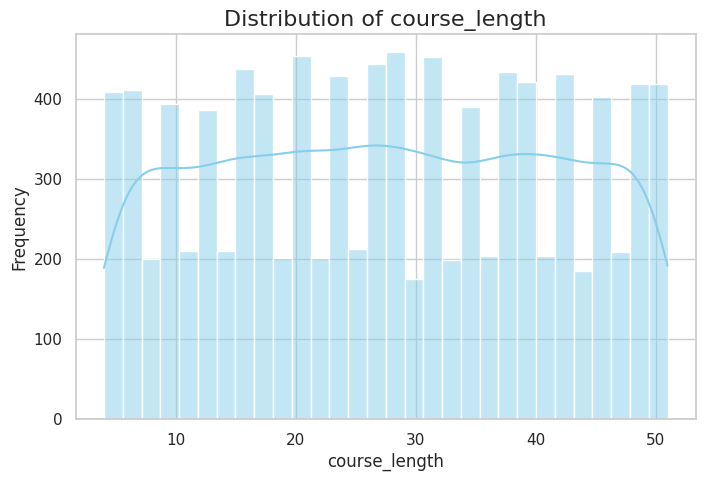

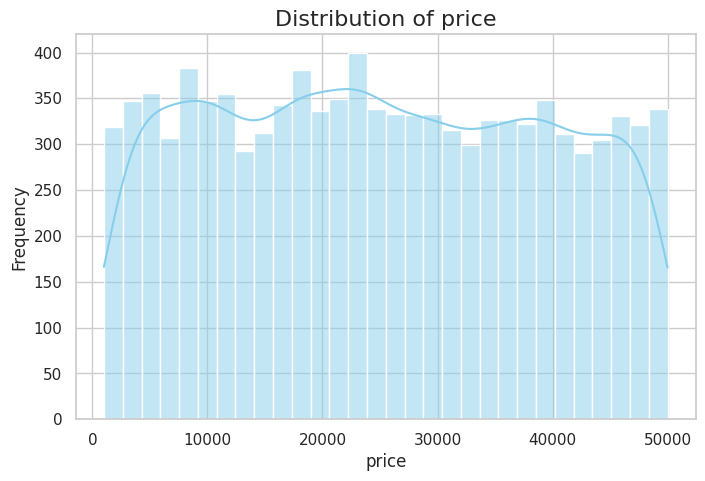

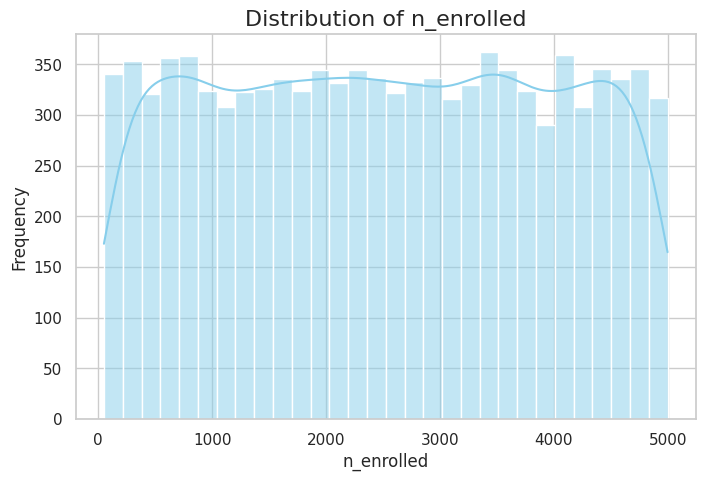

Visualizing categorical features...


<ipython-input-13-374ff496b3b9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


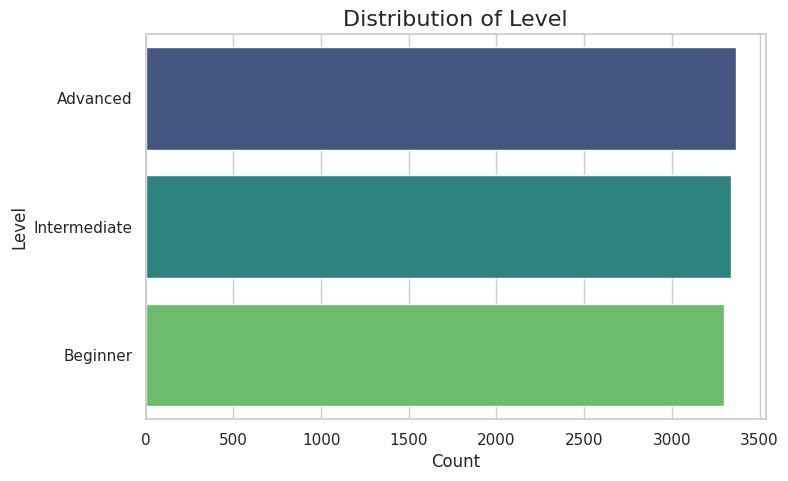

<ipython-input-13-374ff496b3b9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


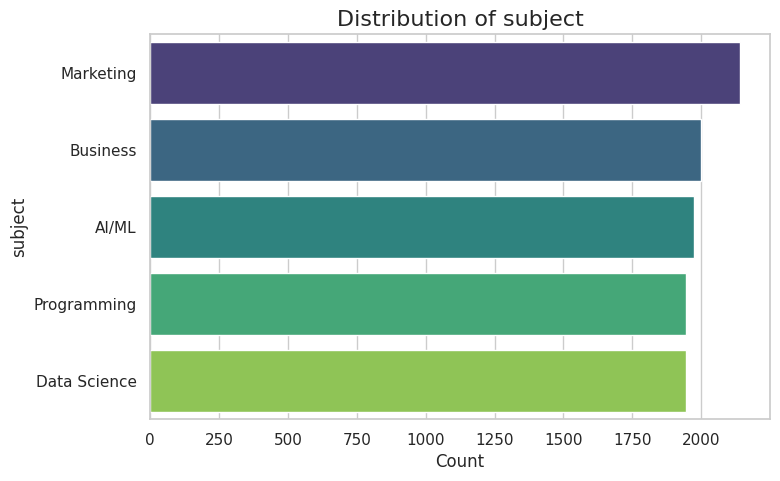

<ipython-input-13-374ff496b3b9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


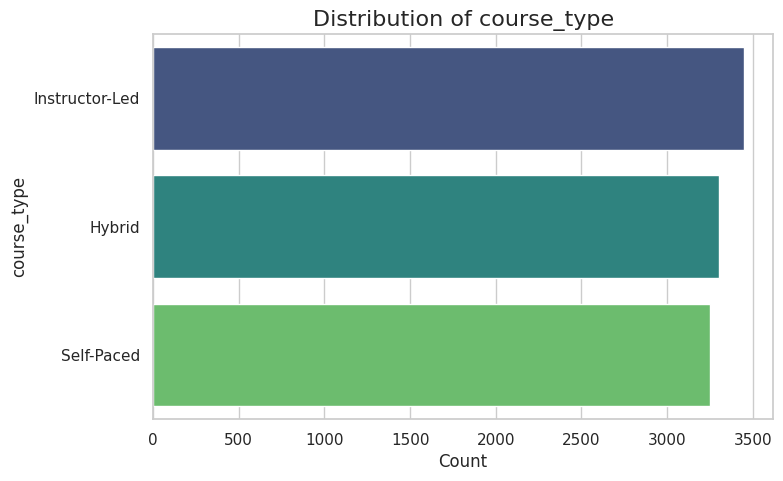

<ipython-input-13-374ff496b3b9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


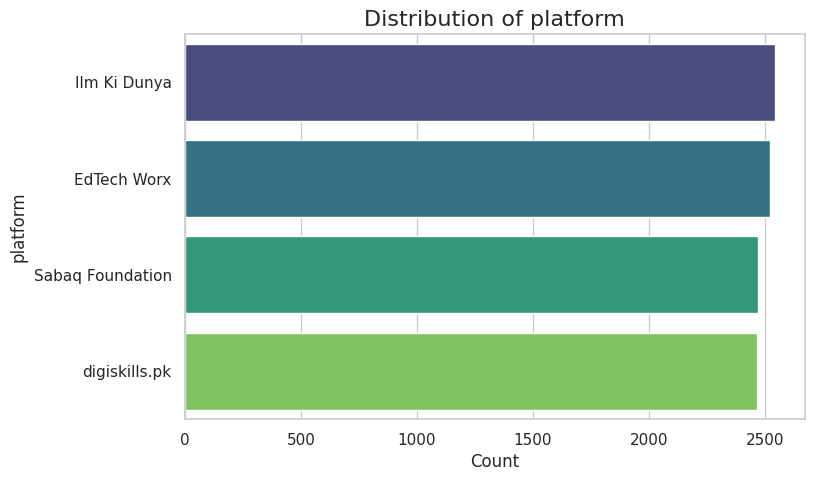

Visualizing relationships between features and target variable...


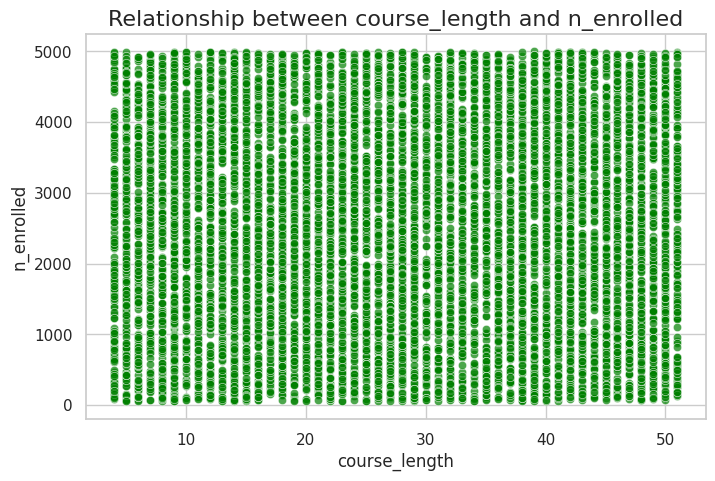

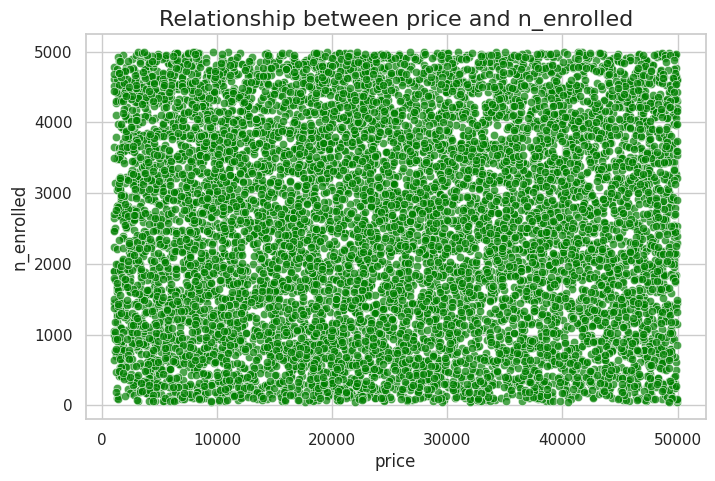

Visualization complete!


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dataset(df):
    """
    Automatically visualize the dataset with histograms, bar plots, and scatterplots.

    Args:
        df (pd.DataFrame): The dataset to visualize.

    Returns:
        None
    """
    # Set global plot style
    sns.set(style="whitegrid", palette="muted")

    # Numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Plot numerical features (Histograms)
    print("Visualizing numerical features...")
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.show()

    # Plot categorical features (Bar plots)
    print("Visualizing categorical features...")
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.show()

    # Scatterplots between numerical features and the target variable
    print("Visualizing relationships between features and target variable...")
    if 'n_enrolled' in numerical_cols:  # Target variable
        target = 'n_enrolled'
        for col in numerical_cols:
            if col != target:
                plt.figure(figsize=(8, 5))
                sns.scatterplot(x=col, y=target, data=df, alpha=0.7, color='green')
                plt.title(f'Relationship between {col} and {target}', fontsize=16)
                plt.xlabel(col, fontsize=12)
                plt.ylabel(target, fontsize=12)
                plt.show()

    print("Visualization complete!")

# Example usage with the synthetic dataset
# df = pd.read_csv('online_edu_data_pakistan.csv')
visualize_dataset(df)

In [14]:
df

,course_length,price,Level,subject,course_type,n_enrolled,platform
0,42,12656,Advanced,Marketing,Hybrid,2853,EdTech Worx
1,32,16893,Beginner,Business,Instructor-Led,3299,digiskills.pk
2,18,46857,Intermediate,Data Science,Hybrid,2205,EdTech Worx
3,46,17493,Intermediate,Data Science,Instructor-Led,1876,Ilm Ki Dunya
4,11,4632,Advanced,Marketing,Self-Paced,3807,Ilm Ki Dunya
...,...,...,...,...,...,...,...
9995,20,20472,Advanced,Business,Self-Paced,2510,EdTech Worx
9996,33,17524,Intermediate,AI/ML,Hybrid,2628,EdTech Worx
9997,42,47387,Advanced,Data Science,Instructor-Led,1194,Ilm Ki Dunya
9998,10,5539,Intermediate,Business,Self-Paced,4214,digiskills.pk


In [16]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.4 MB/s eta 0:00:00


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce  # Install with pip install category_encoders

class AutoEncoder:
    def __init__(self, label_threshold=10, binary_threshold=50):
        """
        Initialize the AutoEncoder with thresholds.
        :param label_threshold: Maximum unique values for using label encoding.
        :param binary_threshold: Maximum unique values for using binary encoding.
        """
        self.label_threshold = label_threshold
        self.binary_threshold = binary_threshold
        self.encoders = {}

    def fit_transform(self, df):
        """
        Automatically identifies categorical variables, fits, and transforms them.
        :param df: Input DataFrame.
        :return: Transformed DataFrame with categorical variables encoded.
        """
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return self._encode(df, categorical_cols)

    def transform(self, df):
        """
        Transforms new data using the fitted encoders.
        :param df: New DataFrame to transform.
        :return: Transformed DataFrame.
        """
        transformed_df = df.copy()
        for col, encoder in self.encoders.items():
            if isinstance(encoder, LabelEncoder):
                transformed_df[col] = encoder.transform(df[col])
            elif isinstance(encoder, ce.BinaryEncoder):
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = transformed_df.join(encoder.transform(df[col]))
            elif isinstance(encoder, OneHotEncoder):
                ohe_df = pd.DataFrame(encoder.transform(df[[col]]),
                                      columns=[f"{col}_{cat}" for cat in encoder.categories_[0][1:]],
                                      index=df.index)
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = pd.concat([transformed_df, ohe_df], axis=1)
        return transformed_df

    def _encode(self, df, columns):
        """
        Encodes the specified columns in the DataFrame.
        :param df: Input DataFrame.
        :param columns: List of column names to encode.
        :return: Transformed DataFrame.
        """
        transformed_df = df.copy()
        for col in columns:
            unique_vals = df[col].nunique()
            if unique_vals <= self.label_threshold:
                # Label Encoding
                le = LabelEncoder()
                transformed_df[col] = le.fit_transform(df[col])
                self.encoders[col] = le
            elif unique_vals <= self.binary_threshold:
                # Binary Encoding
                be = ce.BinaryEncoder(cols=[col])
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = transformed_df.join(be.fit_transform(df[col]))
                self.encoders[col] = be
            else:
                # One-Hot Encoding
                ohe = OneHotEncoder(sparse=False, drop='first')
                ohe_df = pd.DataFrame(ohe.fit_transform(df[[col]]),
                                      columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
                                      index=df.index)
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = pd.concat([transformed_df, ohe_df], axis=1)
                self.encoders[col] = ohe
        return transformed_df

    def apply_encoding(self, df):
        """
        Automatically applies encoding to the DataFrame and updates it in place.
        :param df: DataFrame to transform and update.
        """
        transformed_df = self.fit_transform(df)
        df.update(transformed_df)

# Example Usage
if __name__ == "__main__":
    data = pd.DataFrame({
        'A': ['a', 'b', 'a', 'c'],
        'B': ['x', 'y', 'z', 'x'],
        'C': ['high', 'medium', 'low', 'medium'],
        'D': [1, 2, 3, 4]  # Numerical column
    })

encoder = AutoEncoder(label_threshold=3, binary_threshold=5)
# Automatically transform and replace data
encoder.apply_encoding(df)
print(df)

      course_length  price Level       subject course_type  n_enrolled  \
0                42  12656     0     Marketing           0        2853   
1                32  16893     1      Business           1        3299   
2                18  46857     2  Data Science           0        2205   
3                46  17493     2  Data Science           1        1876   
4                11   4632     0     Marketing           2        3807   
...             ...    ...   ...           ...         ...         ...   
9995             20  20472     0      Business           2        2510   
9996             33  17524     2         AI/ML           0        2628   
9997             42  47387     0  Data Science           1        1194   
9998             10   5539     2      Business           2        4214   
9999             30  19857     1      Business           0         684   

           platform  
0       EdTech Worx  
1     digiskills.pk  
2       EdTech Worx  
3      Ilm Ki Dunya  
4

In [21]:
df['subject']

,subject
0,Marketing
1,Business
2,Data Science
3,Data Science
4,Marketing
...,...
9995,Business
9996,AI/ML
9997,Data Science
9998,Business


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce  # Install with pip install category_encoders

class AutoEncoder:
    def __init__(self, label_threshold=10, binary_threshold=50):
        """
        Initialize the AutoEncoder with thresholds.
        :param label_threshold: Maximum unique values for using label encoding.
        :param binary_threshold: Maximum unique values for using binary encoding.
        """
        self.label_threshold = label_threshold
        self.binary_threshold = binary_threshold
        self.encoders = {}

    def fit_transform(self, df):
        """
        Automatically identifies categorical variables, fits, and transforms them.
        :param df: Input DataFrame.
        :return: Transformed DataFrame with categorical variables encoded.
        """
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return self._encode(df, categorical_cols)

    def transform(self, df):
        """
        Transforms new data using the fitted encoders.
        :param df: New DataFrame to transform.
        :return: Transformed DataFrame.
        """
        transformed_df = df.copy()
        for col, encoder in self.encoders.items():
            if isinstance(encoder, LabelEncoder):
                transformed_df[col] = encoder.transform(df[col])
            elif isinstance(encoder, ce.BinaryEncoder):
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = transformed_df.join(encoder.transform(df[col]))
            elif isinstance(encoder, OneHotEncoder):
                ohe_df = pd.DataFrame(encoder.transform(df[[col]]),
                                      columns=[f"{col}_{cat}" for cat in encoder.categories_[0][1:]],
                                      index=df.index)
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = pd.concat([transformed_df, ohe_df], axis=1)
        return transformed_df

    def _encode(self, df, columns):
        """
        Encodes the specified columns in the DataFrame.
        :param df: Input DataFrame.
        :param columns: List of column names to encode.
        :return: Transformed DataFrame.
        """
        transformed_df = df.copy()
        for col in columns:
            unique_vals = df[col].nunique()
            if unique_vals <= self.label_threshold:
                # Label Encoding
                le = LabelEncoder()
                transformed_df[col] = le.fit_transform(df[col])
                self.encoders[col] = le
            elif unique_vals <= self.binary_threshold:
                # Binary Encoding
                be = ce.BinaryEncoder(cols=[col])
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = transformed_df.join(be.fit_transform(df[col]))
                self.encoders[col] = be
            else:
                # One-Hot Encoding
                ohe = OneHotEncoder(sparse=False, drop='first')
                ohe_df = pd.DataFrame(ohe.fit_transform(df[[col]]),
                                      columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
                                      index=df.index)
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = pd.concat([transformed_df, ohe_df], axis=1)
                self.encoders[col] = ohe
        return transformed_df

    def apply_encoding(self, df):
        """
        Automatically applies encoding to the DataFrame and updates it in place.
        :param df: DataFrame to transform and update.
        """
        transformed_df = self.fit_transform(df)
        df.update(transformed_df)

# Example Usage
if __name__ == "__main__":
    data = pd.DataFrame({
        'A': ['a', 'b', 'a', 'c'],
        'B': ['x', 'y', 'z', 'x'],
        'C': ['high', 'medium', 'low', 'medium'],
        'D': [1, 2, 3, 4]  # Numerical column
    })

    encoder = AutoEncoder(label_threshold=3, binary_threshold=5)

    # Automatically transform and replace data
    encoder.apply_encoding(df)
    print(df)

      course_length  price Level       subject course_type  n_enrolled  \
0                42  12656     0     Marketing           0        2853   
1                32  16893     1      Business           1        3299   
2                18  46857     2  Data Science           0        2205   
3                46  17493     2  Data Science           1        1876   
4                11   4632     0     Marketing           2        3807   
...             ...    ...   ...           ...         ...         ...   
9995             20  20472     0      Business           2        2510   
9996             33  17524     2         AI/ML           0        2628   
9997             42  47387     0  Data Science           1        1194   
9998             10   5539     2      Business           2        4214   
9999             30  19857     1      Business           0         684   

           platform  
0       EdTech Worx  
1     digiskills.pk  
2       EdTech Worx  
3      Ilm Ki Dunya  
4

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce  # Ensure it's installed (pip install category_encoders)

class AutoEncoder:
    def __init__(self, label_threshold=10, binary_threshold=50):
        """
        Initialize the AutoEncoder with thresholds.
        :param label_threshold: Maximum unique values for using label encoding.
        :param binary_threshold: Maximum unique values for using binary encoding.
        """
        self.label_threshold = label_threshold
        self.binary_threshold = binary_threshold
        self.encoders = {}

    def fit_transform(self, df):
        """
        Automatically identifies categorical variables, fits, and transforms them.
        :param df: Input DataFrame.
        :return: Transformed DataFrame with categorical variables encoded.
        """
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return self._encode(df, categorical_cols)

    def _encode(self, df, columns):
        """
        Encodes the specified columns in the DataFrame.
        :param df: Input DataFrame.
        :param columns: List of column names to encode.
        :return: Transformed DataFrame.
        """
        transformed_df = df.copy()
        for col in columns:
            unique_vals = df[col].nunique()
            if unique_vals <= self.label_threshold:
                # Label Encoding
                le = LabelEncoder()
                transformed_df[col] = le.fit_transform(df[col])
                self.encoders[col] = le
            elif unique_vals <= self.binary_threshold:
                # Binary Encoding
                be = ce.BinaryEncoder(cols=[col])
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = transformed_df.join(be.fit_transform(df[col]))
                self.encoders[col] = be
            else:
                # One-Hot Encoding
                ohe = OneHotEncoder(sparse=False, drop='first')
                ohe_df = pd.DataFrame(ohe.fit_transform(df[[col]]),
                                      columns=[f"{col}_{cat}" for cat in ohe.categories_[0][1:]],
                                      index=df.index)
                transformed_df = transformed_df.drop(col, axis=1)
                transformed_df = pd.concat([transformed_df, ohe_df], axis=1)
                self.encoders[col] = ohe
        return transformed_df

    def apply_encoding(self, df):
        """
        Automatically applies encoding to the DataFrame and updates it in place.
        :param df: DataFrame to transform and update.
        """
        transformed_df = self.fit_transform(df)
        df.update(transformed_df)

# Example Usage
encoder = AutoEncoder(label_threshold=3, binary_threshold=5)
transformed_data = encoder.fit_transform(df)
print("Transformed Data:")
print(transformed_data)

Transformed Data:
      course_length  price  Level  course_type  n_enrolled  subject_0  \
0                42  12656      0            0        2853          0   
1                32  16893      1            1        3299          0   
2                18  46857      2            0        2205          0   
3                46  17493      2            1        1876          0   
4                11   4632      0            2        3807          0   
...             ...    ...    ...          ...         ...        ...   
9995             20  20472      0            2        2510          0   
9996             33  17524      2            0        2628          1   
9997             42  47387      0            1        1194          0   
9998             10   5539      2            2        4214          0   
9999             30  19857      1            0         684          0   

      subject_1  subject_2  platform_0  platform_1  platform_2  
0             0          1           0  

In [27]:
df = transformed_data
df

,course_length,price,Level,course_type,n_enrolled,subject_0,subject_1,subject_2,platform_0,platform_1,platform_2
0,42,12656,0,0,2853,0,0,1,0,0,1
1,32,16893,1,1,3299,0,1,0,0,1,0
2,18,46857,2,0,2205,0,1,1,0,0,1
3,46,17493,2,1,1876,0,1,1,0,1,1
4,11,4632,0,2,3807,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,20,20472,0,2,2510,0,1,0,0,0,1
9996,33,17524,2,0,2628,1,0,1,0,0,1
9997,42,47387,0,1,1194,0,1,1,0,1,1
9998,10,5539,2,2,4214,0,1,0,0,1,0
